In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error


In [2]:
car_data = pd.read_csv('car_sales_data.csv', header = 0, sep=',')
car_data.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


In [3]:
car_data.shape

(50000, 7)

In [4]:
car_data.isnull().sum()

Manufacturer           0
Model                  0
Engine size            0
Fuel type              0
Year of manufacture    0
Mileage                0
Price                  0
dtype: int64

In [5]:
car_data.loc[car_data.duplicated()]

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
5426,VW,Polo,1.2,Petrol,2003,10000,8024
9862,Ford,Mondeo,1.4,Diesel,1987,224569,883
14745,BMW,Z4,2.4,Petrol,1999,12000,13410
19020,Toyota,Yaris,1.0,Petrol,1996,13500,5087
19337,VW,Polo,1.0,Petrol,2000,11500,5950
23927,VW,Polo,1.2,Petrol,2021,1000,27901
25368,VW,Golf,1.2,Diesel,2011,6000,17401
28576,VW,Polo,1.2,Petrol,2003,10000,8024
34246,VW,Passat,2.0,Diesel,2003,10000,16087
35647,Ford,Focus,1.6,Petrol,2019,2000,39636


In [6]:
car_data = car_data.drop_duplicates()

In [7]:
car_data.duplicated().sum()

np.int64(0)

In [8]:
car_data.shape

(49988, 7)

In [9]:
car_data.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


In [10]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49988 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         49988 non-null  object 
 1   Model                49988 non-null  object 
 2   Engine size          49988 non-null  float64
 3   Fuel type            49988 non-null  object 
 4   Year of manufacture  49988 non-null  int64  
 5   Mileage              49988 non-null  int64  
 6   Price                49988 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 3.1+ MB


In [11]:
Q1 = car_data['Price'].quantile(0.25)
Q3 = car_data['Price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

car_data = car_data[(car_data['Price']>= lower_bound) & (car_data['Price'] <= upper_bound)]

<Axes: xlabel='Manufacturer'>

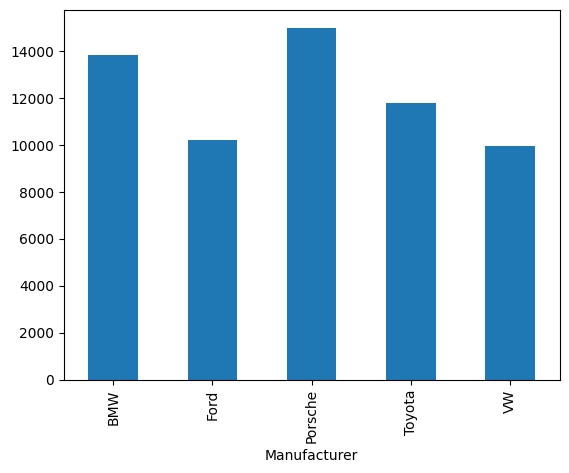

In [12]:
car_data.groupby('Manufacturer')['Price'].mean().plot(kind = 'bar')

<Axes: xlabel='Model'>

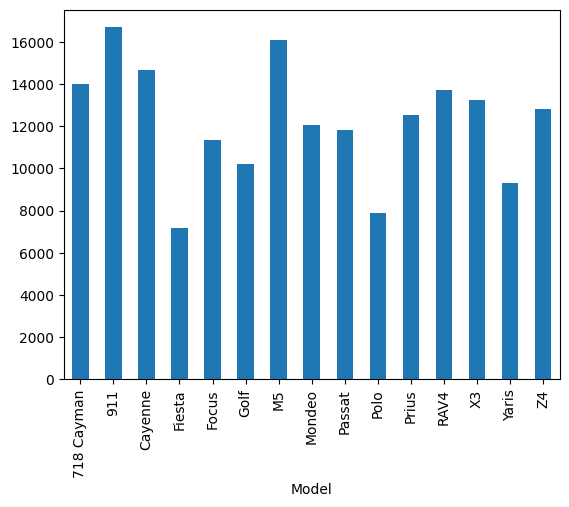

In [13]:
car_data.groupby('Model')['Price'].mean().plot(kind = 'bar')

<Axes: xlabel='Fuel type'>

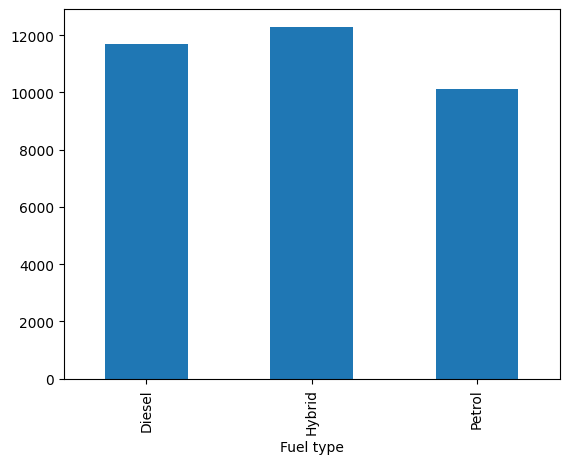

In [14]:
car_data.groupby('Fuel type')['Price'].mean().plot(kind = 'bar')

<Axes: >

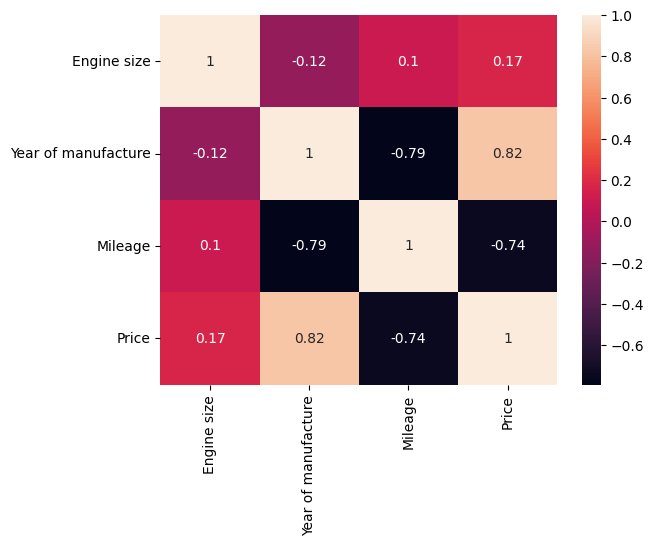

In [15]:
corr_matrix = car_data.corr(numeric_only=True)

sns.heatmap(data = corr_matrix, annot = True)

In [16]:
car_data.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101
5,Ford,Focus,1.4,Petrol,2018,33603,29204


In [17]:
manufacturer = pd.get_dummies(car_data['Manufacturer'], drop_first=True, dtype = int)
manufacturer

,Ford,Porsche,Toyota,VW
0,1,0,0,0
2,1,0,0,0
3,0,0,1,0
4,0,0,0,1
5,1,0,0,0
...,...,...,...,...
49993,1,0,0,0
49994,0,0,1,0
49996,0,0,1,0
49998,1,0,0,0


In [18]:
model = pd.get_dummies(car_data['Model'], drop_first=True, dtype = int)
model

,911,Cayenne,Fiesta,Focus,Golf,M5,Mondeo,Passat,Polo,Prius,RAV4,X3,Yaris,Z4
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,0,0,0,0,0,0,1,0,0,0,0,0,0,0
49994,0,0,0,0,0,0,0,0,0,0,1,0,0,0
49996,0,0,0,0,0,0,0,0,0,1,0,0,0,0
49998,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [19]:
fuel_type = pd.get_dummies(car_data['Fuel type'], drop_first=True, dtype = int)
fuel_type

,Hybrid,Petrol
0,0,1
2,0,0
3,1,0
4,0,1
5,0,1
...,...,...
49993,0,1
49994,1,0
49996,1,0
49998,0,0


In [20]:
car_data = pd.concat([car_data, manufacturer, model, fuel_type], axis = 1)
car_data

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price,Ford,Porsche,Toyota,...,Mondeo,Passat,Polo,Prius,RAV4,X3,Yaris,Z4,Hybrid,Petrol
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4,VW,Polo,1.0,Petrol,2006,127869,4101,0,0,0,...,0,0,1,0,0,0,0,0,0,1
5,Ford,Focus,1.4,Petrol,2018,33603,29204,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,Ford,Mondeo,1.8,Petrol,2003,120969,6654,1,0,0,...,1,0,0,0,0,0,0,0,0,1
49994,Toyota,RAV4,1.8,Hybrid,2002,101634,10639,0,0,1,...,0,0,0,0,1,0,0,0,1,0
49996,Toyota,Prius,1.8,Hybrid,2003,105120,9430,0,0,1,...,0,0,0,1,0,0,0,0,1,0
49998,Ford,Focus,1.0,Diesel,2016,26468,23630,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
car_data = car_data.drop(['Manufacturer','Model','Fuel type'], axis = 1)
car_data

,Engine size,Year of manufacture,Mileage,Price,Ford,Porsche,Toyota,VW,911,Cayenne,...,Mondeo,Passat,Polo,Prius,RAV4,X3,Yaris,Z4,Hybrid,Petrol
0,1.0,2002,127300,3074,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1.6,2014,39190,24072,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.8,1988,210814,1705,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,1.0,2006,127869,4101,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
5,1.4,2018,33603,29204,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,1.8,2003,120969,6654,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
49994,1.8,2002,101634,10639,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
49996,1.8,2003,105120,9430,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
49998,1.0,2016,26468,23630,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
y = car_data['Price']
X = car_data.drop('Price', axis = 1)

In [23]:
X.head()

,Engine size,Year of manufacture,Mileage,Ford,Porsche,Toyota,VW,911,Cayenne,Fiesta,...,Mondeo,Passat,Polo,Prius,RAV4,X3,Yaris,Z4,Hybrid,Petrol
0,1.0,2002,127300,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1.6,2014,39190,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.8,1988,210814,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,1.0,2006,127869,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
5,1.4,2018,33603,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Using Linear Regression Model.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

price_model = LinearRegression()
price_model.fit(X_train, y_train)
pre_y = price_model.predict(X_test)

In [25]:
r2_score = r2_score(y_test, pre_y)
r2_score

0.808185698127409

In [26]:
mae = mean_absolute_error(y_test, pre_y)
mae

3561.330915345473

In [27]:
residual_test = y_test - pre_y

fig = px.scatter(x = pre_y, y = residual_test, title = 'Residual Plot')
fig.add_hline(y = 0, line_color = 'darkblue')
fig.update_layout(xaxis_title = 'Fitted Values(pre_y)', yaxis_title = 'Residual (Residual_test)')
fig.show()


Text(0, 0.5, 'Residuals (Residual_test)')

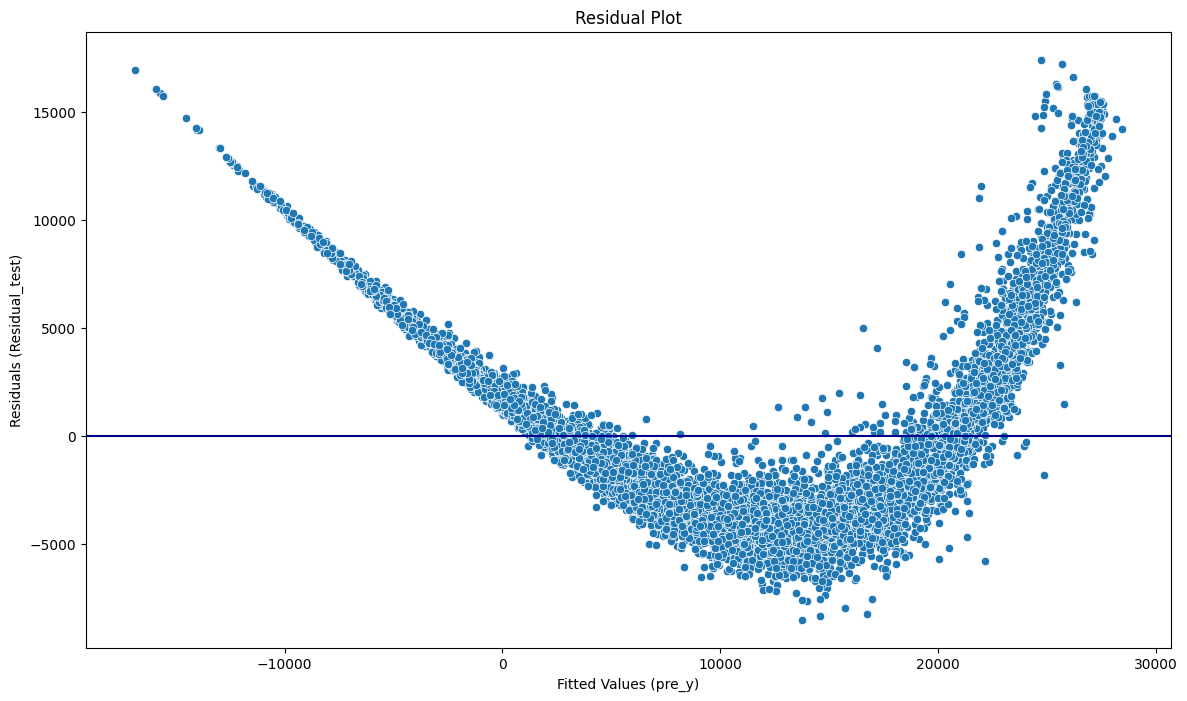

In [28]:
plt.figure(figsize = (14,8))
sns.scatterplot(x = pre_y, y =residual_test)
plt.axhline(y = 0, color = 'darkblue')
plt.title('Residual Plot')
plt.xlabel('Fitted Values (pre_y)')
plt.ylabel('Residuals (Residual_test)')

As per the above calculations, R Squared is closer to 1. That means, regression relation is strong. In other words, the feature variables are largely contributes to the price of a car. But here, the Mean Absolute Error is higher. We can see by looking at the Residual plot. It having a pattern between y_test and pre_y. It indicates eventhough it had higher R Squared value, Linear Regression model is not suitable here.

Using Random Forest Regressor

In [29]:
model2 = RandomForestRegressor()

model2.fit(X_train,y_train)
pre_y2 = model2.predict(X_test)


In [30]:
mae2 = mean_absolute_error(y_test,pre_y2)
mae2

245.44995564005066

In [31]:
mape2 = mean_absolute_percentage_error(y_test,pre_y2)*100
mape2

3.0002670068079795

Text(0, 0.5, 'pre_y2')

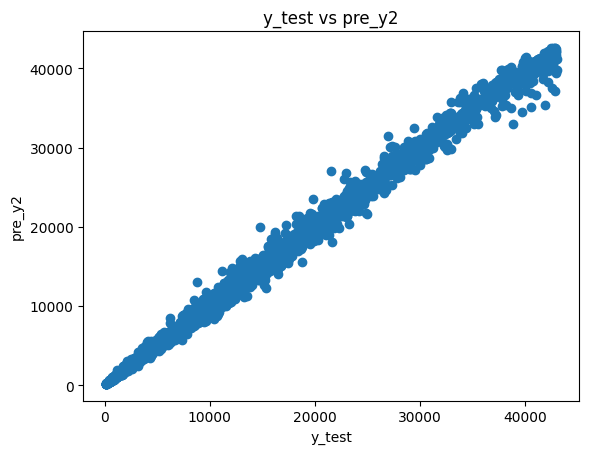

In [32]:
plt.scatter(x = y_test, y = pre_y2)
plt.title('y_test vs pre_y2')
plt.xlabel('y_test')
plt.ylabel('pre_y2')

By looking at the following scatter plot, we can say, Random Forest Regressor model is more suitable than Linear Regression model, Because its Mean Squared Error very much lesser, and its close to 3%. 
We can show the suitability of the model by looking at the Residual Plot (plotting residuals against fitted values).
Residuals are closely scattered around line y = 0 means, the model used is more suitable to make predictions.

In [33]:
residual_test2 = y_test - pre_y2

fig = px.scatter(x = pre_y2, y = residual_test2 ,title = 'Residual Plot')
fig.add_hline(y = 0, line_color = 'darkblue')
fig.update_layout(xaxis_title = 'Fitted Values (pre_y2)', yaxis_title = 'Residuals (Residual Test2)')
fig.show()

Text(0, 0.5, 'Residuals (Residual_test2)')

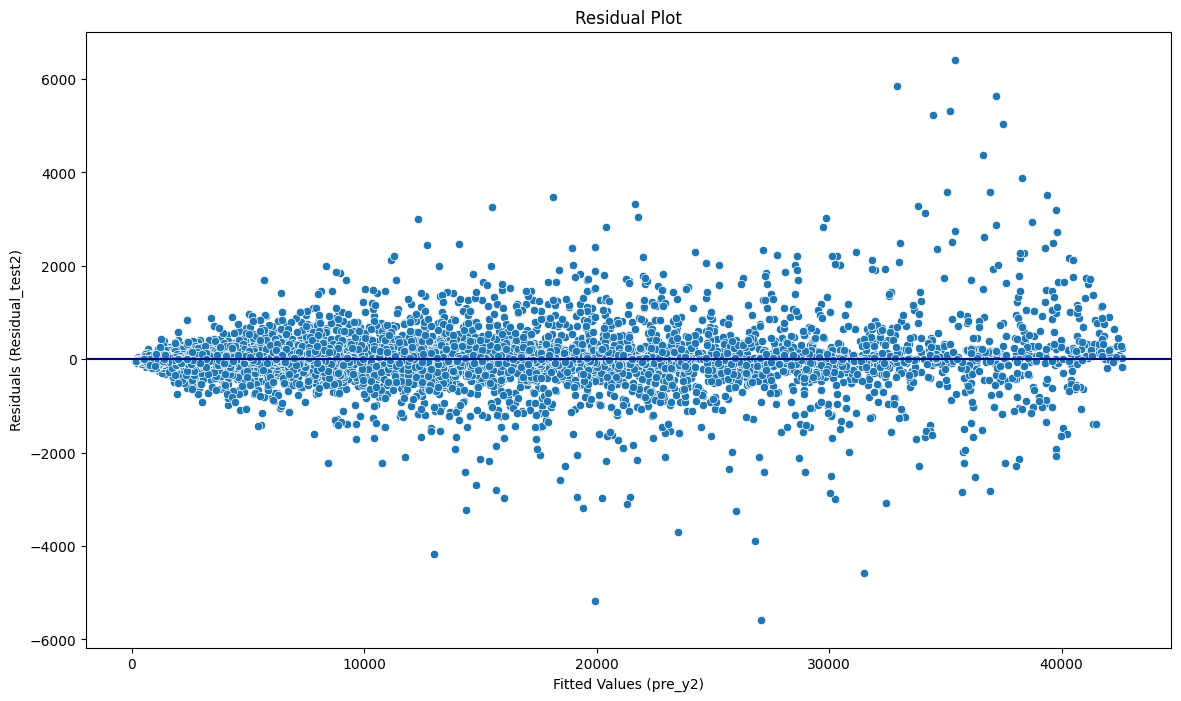

In [34]:
plt.figure(figsize = (14,8))
sns.scatterplot(x = pre_y2, y =residual_test2 )
plt.axhline(y = 0, color = 'darkblue')
plt.title('Residual Plot')
plt.xlabel('Fitted Values (pre_y2)')
plt.ylabel('Residuals (Residual_test2)')

Using Decision Tree Regressor Model

In [35]:
model3 = DecisionTreeRegressor()

model3.fit(X_train,y_train)
pre_y3 = model3.predict(X_test)


In [36]:
mae3 = mean_absolute_error(y_test,pre_y3)
mae3

400.69254330376003

In [37]:
mape3 = mean_absolute_percentage_error(y_test, pre_y3)*100
mape3

5.02496972480392

Text(0, 0.5, 'Residuals (Residual_test3)')

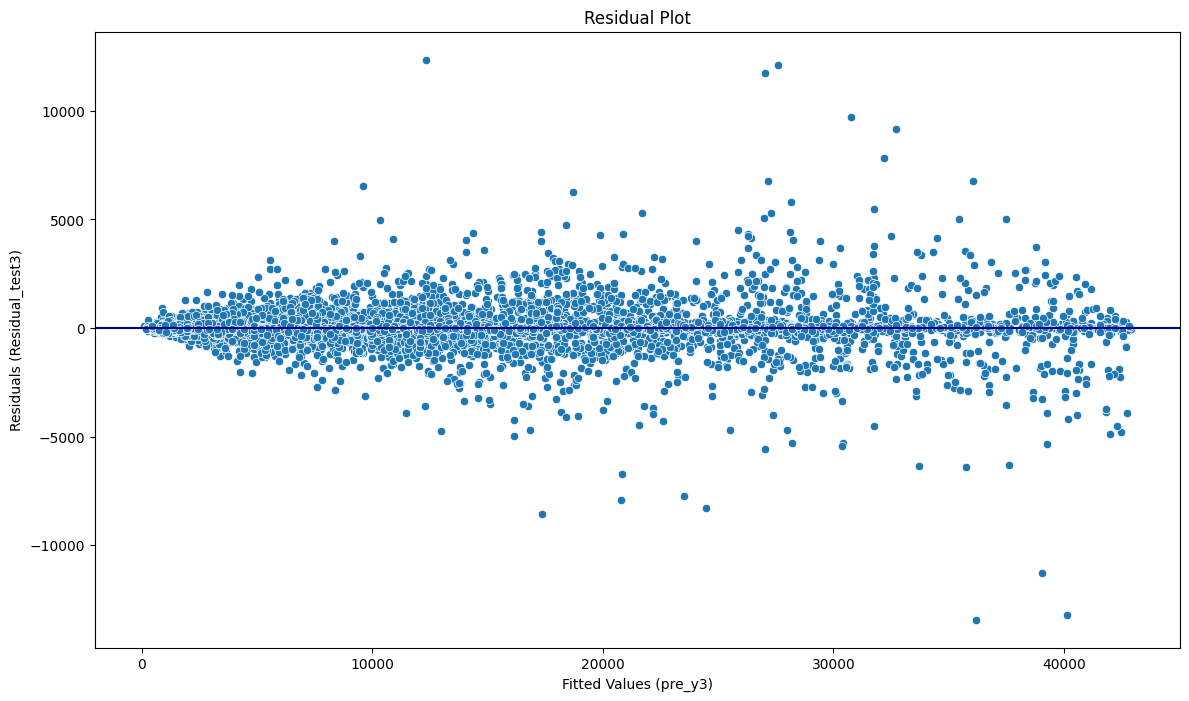

In [38]:
residual_test3 = y_test - pre_y3
plt.figure(figsize = (14,8))
sns.scatterplot(x = pre_y3, y =residual_test3 )
plt.axhline(y = 0, color = 'darkblue')
plt.title('Residual Plot')
plt.xlabel('Fitted Values (pre_y3)')
plt.ylabel('Residuals (Residual_test3)')

In [39]:
fig = px.scatter(x = pre_y3, y = residual_test3, title = 'Residual Plot')
fig.add_hline(y = 0, line_color = 'darkblue')
fig.update_layout(xaxis_title = 'Fitted Values (pre_y3)', yaxis_title = 'Residuals (residual_test3)')
fig.show()

The above Residual Plot also indicates that the model Decision Tree Regressor also suitable for make predict car price.

In Conclution, we can use Decision Tree Regressor and Random Forest Regressor to make predictions for this dataset. Random Forest Dataset is most suitable.